In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
x    = np.arange(-10, 10, 0.01) 
offs = 0
x
y    =  np.cos(4*x) + 0.01*x*x + 0.1*x + offs


In [3]:
x.shape

(2000,)

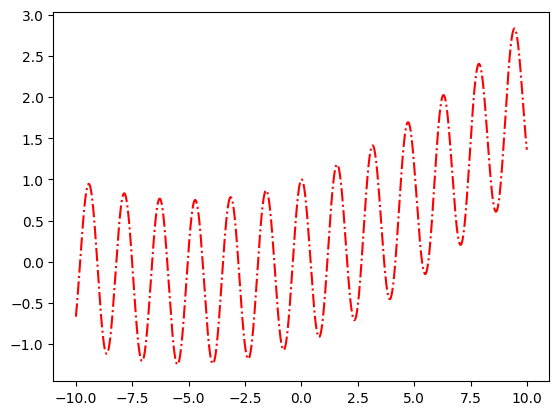

In [4]:
plt.plot(x, y,'-.r')
plt.show()

In [5]:
n   = 170  #choose "n" samples from the function
idx = np.random.choice(y.size, n, replace = False)

px  = x[idx]
py  = y[idx].T

In [18]:
print(y.size)

2000


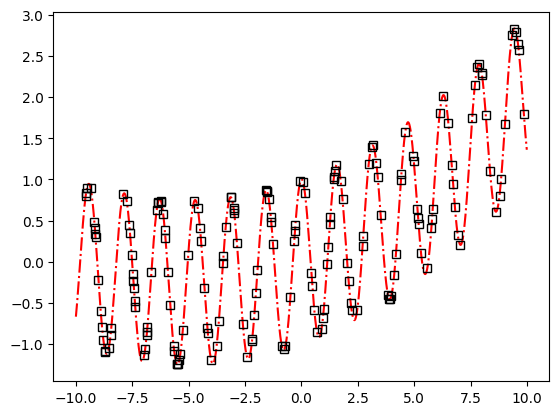

In [6]:
plt.plot(x, y,'-.r')
plt.plot(px, py,'sk',mfc='none')
plt.show()

In [7]:
m = 20 #how many RBFs we choose randomly from the "n" samples
cen = idx[np.random.choice(n,m, replace = False)]
cx = x[cen];

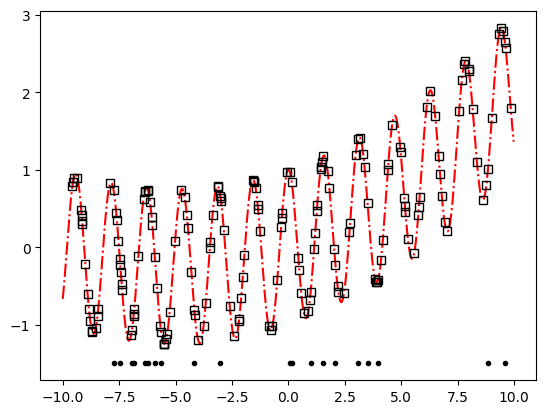

In [23]:
plt.plot(x, y,'-.r')
plt.plot(px, py,'sk',mfc='none')
plt.plot(cx,cx.size*[offs-1.5], '.k')
plt.show()

In [9]:
rbf = lambda x,c,s: np.exp(-(x-c)**2 / (2*s*s))
F = np.zeros((n,m))  #set-up the RBF matrix here
s = 0.5 #just some fixed width!
for i in range(n):
  for j in range(m):
    F[i,j] = rbf(px[i], cx[j], s);


w = np.matmul(np.linalg.pinv(F) , py)


In [10]:
F2 = np.ones((x.size,m))
for j in range(m):
  for i in range(x.size):
    F2[i,j] = rbf(x[i], cx[j], s)
F2

array([[2.34853971e-309, 1.23520230e-105, 3.27939308e-090, ...,
        3.58665895e-012, 4.00652974e-005, 1.86911646e-009],
       [4.99078761e-309, 1.91675713e-105, 4.92073726e-090, ...,
        4.14631968e-012, 4.38296513e-005, 2.12137791e-009],
       [1.06014813e-308, 2.97318796e-105, 7.38062534e-090, ...,
        4.79139268e-012, 4.79285115e-005, 2.40672244e-009],
       ...,
       [8.13658197e-002, 9.04979045e-071, 1.73732715e-084, ...,
        1.23188014e-232, 1.83846390e-273, 7.07051186e-246],
       [7.77855187e-002, 6.31761398e-071, 1.17274577e-084, ...,
        6.40658692e-233, 9.04774432e-274, 3.61009063e-246],
       [7.43330209e-002, 4.40853133e-071, 7.91320517e-085, ...,
        3.33051407e-233, 4.45094076e-274, 1.84251756e-246]])

In [24]:
print(x.size)

2000


In [11]:
Y = np.matmul(F2,w)
Y

array([-4.50154322e-04, -4.91317054e-04, -5.36013364e-04, ...,
        1.69486115e+00,  1.66693183e+00,  1.63888128e+00])

In [12]:
Y.shape

(2000,)

/var/folders/xy/jhstkkdx60bfh4q1zbwy93zh0000gn/T/ipykernel_48574/1814863133.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, Y, 'k',c='blue')


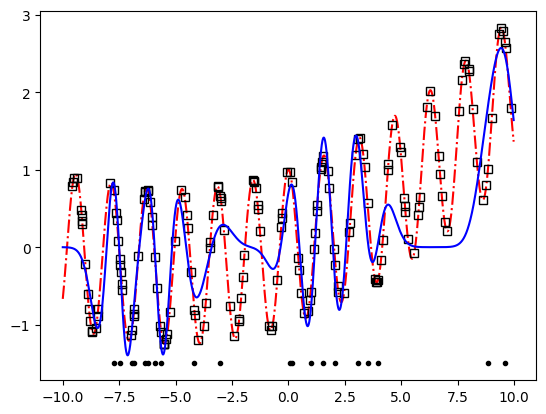

In [13]:
plt.plot(x, y,'-.r')
plt.plot(px, py,'sk',mfc='none')
plt.plot(cx,cx.size*[offs-1.5], '.k')
plt.plot(x, Y, 'k',c='blue')
plt.show()